In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 1. Загрузка данных

In [3]:
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# 2. Проверка на наличие пропусков

In [4]:
print(data.isnull().sum())
data = data.dropna()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# 3. Разделение выборки

In [5]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Построение модели линейной регрессии и вычисление метрик

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print(f'Train RMSE: {rmse_train}, Train R²: {r2_train}')
print(f'Test RMSE: {rmse_test}, Test R²: {r2_test}')

Train RMSE: 0.7196757085831575, Train R²: 0.6125511913966952
Test RMSE: 0.7455813830127761, Test R²: 0.5757877060324511


# 5. График распределения целевой переменной

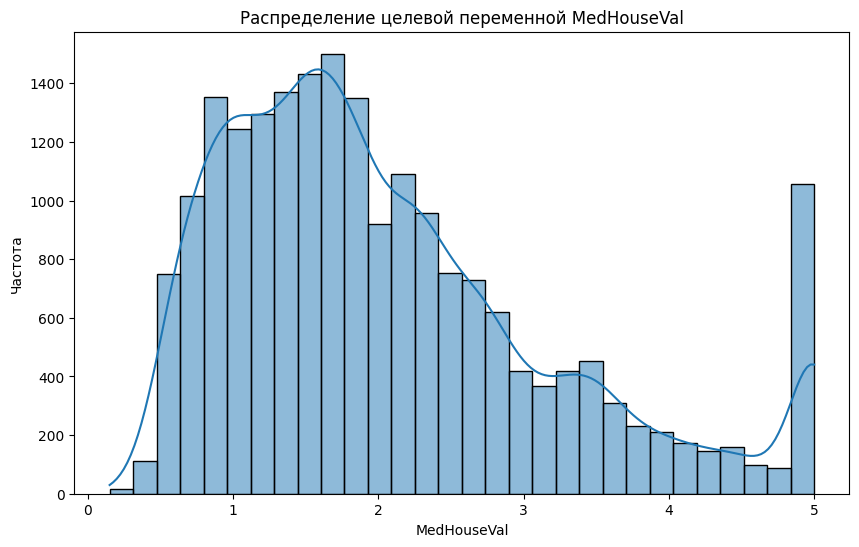

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MedHouseVal'], bins=30, kde=True)
plt.title('Распределение целевой переменной MedHouseVal')
plt.xlabel('MedHouseVal')
plt.ylabel('Частота')
plt.show()

# 6. Корреляционная матрица

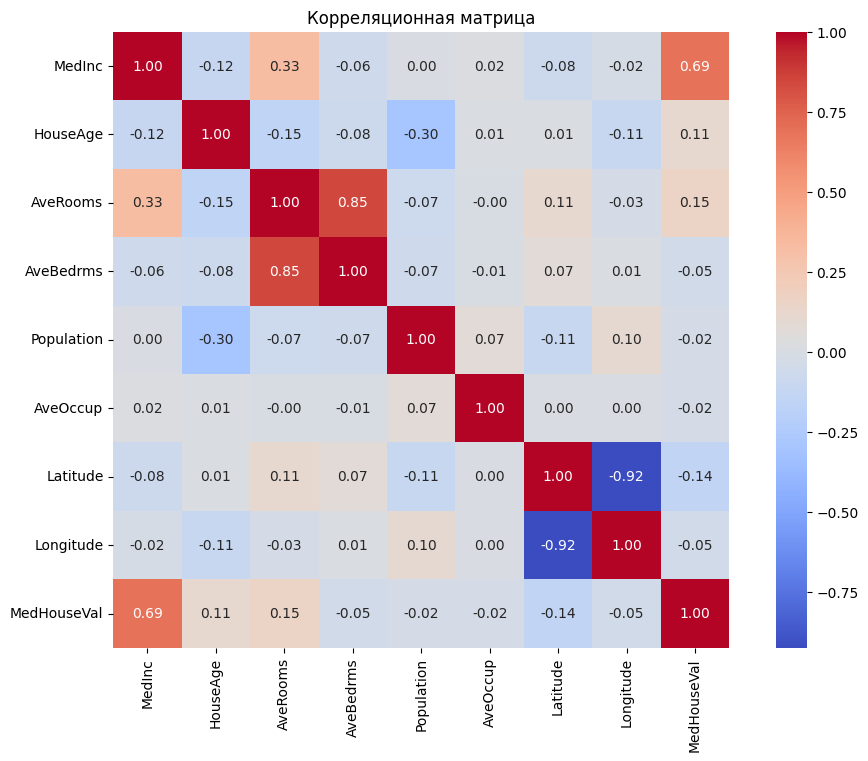

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

# Удаление признаков на основании корреляции с целевой переменной MedHouseVal

In [9]:
threshold = 0.1
correlation_features = correlation_matrix['MedHouseVal'][abs(correlation_matrix['MedHouseVal']) > threshold].index.tolist()
X_filtered = data[correlation_features].drop('MedHouseVal', axis=1)


In [10]:
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

In [11]:
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

LinearRegression()

In [12]:
y_train_filtered_pred = model_filtered.predict(X_train_filtered)
y_test_filtered_pred = model_filtered.predict(X_test_filtered)
rmse_train_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_train_filtered_pred))
r2_train_filtered = r2_score(y_train_filtered, y_train_filtered_pred)
rmse_test_filtered = np.sqrt(mean_squared_error(y_test_filtered, y_test_filtered_pred))
r2_test_filtered = r2_score(y_test_filtered, y_test_filtered_pred)
print(f'Filtered Train RMSE: {rmse_train_filtered}, Train R²: {r2_train_filtered}')
print(f'Filtered Test RMSE: {rmse_test_filtered}, Test R²: {r2_test_filtered}')

Filtered Train RMSE: 0.7989089953528047, Train R²: 0.5225419016956813
Filtered Test RMSE: 0.8059451277212133, Test R²: 0.5043169272470042


# 7. Обработка выбросов

In [13]:
Q1 = data['MedHouseVal'].quantile(0.25)
Q3 = data['MedHouseVal'].quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = data[(data['MedHouseVal'] >= (Q1 - 1.5 * IQR)) & (data['MedHouseVal'] <= (Q3 + 1.5 * IQR))]

In [14]:
X_no_outliers = data_no_outliers.drop('MedHouseVal', axis=1)
y_no_outliers = data_no_outliers['MedHouseVal']
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [15]:
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

In [16]:
y_train_no_outliers_pred = model_no_outliers.predict(X_train_no_outliers)
y_test_no_outliers_pred = model_no_outliers.predict(X_test_no_outliers)
rmse_train_no_outliers = np.sqrt(mean_squared_error(y_train_no_outliers, y_train_no_outliers_pred))
r2_train_no_outliers = r2_score(y_train_no_outliers, y_train_no_outliers_pred)
rmse_test_no_outliers = np.sqrt(mean_squared_error(y_test_no_outliers, y_test_no_outliers_pred))
r2_test_no_outliers = r2_score(y_test_no_outliers, y_test_no_outliers_pred)
print(f'No Outliers Train RMSE: {rmse_train_no_outliers}, Train R²: {r2_train_no_outliers}')
print(f'No Outliers Test RMSE: {rmse_test_no_outliers}, Test R²: {r2_test_no_outliers}')

No Outliers Train RMSE: 0.6273342212975435, Train R²: 0.5662399734391855
No Outliers Test RMSE: 0.6072589861493274, Test R²: 0.6012592989543194


# 8. Математические преобразования признаков

In [17]:
data['log_MedHouseVal'] = np.log(data['MedHouseVal'] + 1)  # Логарифм
data['MedHouseVal_squared'] = data['MedHouseVal'] ** 2  # Квадрат

In [18]:
X_transformed = data.drop('MedHouseVal', axis=1)
y_transformed = data['MedHouseVal']
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

In [19]:
model_transformed = LinearRegression()
model_transformed.fit(X_train_transformed, y_train_transformed)

LinearRegression()

In [20]:
y_train_transformed_pred = model_transformed.predict(X_train_transformed)
y_test_transformed_pred = model_transformed.predict(X_test_transformed)
rmse_train_transformed = np.sqrt(mean_squared_error(y_train_transformed, y_train_transformed_pred))
r2_train_transformed = r2_score(y_train_transformed, y_train_transformed_pred)
rmse_test_transformed = np.sqrt(mean_squared_error(y_test_transformed, y_test_transformed_pred))
r2_test_transformed = r2_score(y_test_transformed, y_test_transformed_pred)
print(f'Transformed Train RMSE: {rmse_train_transformed}, Train R²: {r2_train_transformed}')
print(f'Transformed Test RMSE: {rmse_test_transformed}, Test R²: {r2_test_transformed}')

Transformed Train RMSE: 0.030728420905616262, Train R²: 0.9992936480838592
Transformed Test RMSE: 0.030988707975321814, Test R²: 0.9992671753338649


# Выводы

In [21]:
results = pd.DataFrame({
    'Model': ['Original', 'Filtered', 'No Outliers', 'Transformed'],
    'Train RMSE': [rmse_train, rmse_train_filtered, rmse_train_no_outliers, rmse_train_transformed],
    'Test RMSE': [rmse_test, rmse_test_filtered, rmse_test_no_outliers, rmse_test_transformed],
    'Train R²': [r2_train, r2_train_filtered, r2_train_no_outliers, r2_train_transformed],
    'Test R²': [r2_test, r2_test_filtered, r2_test_no_outliers, r2_test_transformed]
})
print(results)

         Model  Train RMSE  Test RMSE  Train R²   Test R²
0     Original    0.719676   0.745581  0.612551  0.575788
1     Filtered    0.798909   0.805945  0.522542  0.504317
2  No Outliers    0.627334   0.607259  0.566240  0.601259
3  Transformed    0.030728   0.030989  0.999294  0.999267


Оригинальная модель:

RMSE: 0.719676 (Train), 0.745581 (Test)
R²: 0.612551 (Train), 0.575788 (Test)
Эта модель служит базовой для сравнения.
Отфильтрованная модель:

RMSE: 0.798909 (Train), 0.805945 (Test)
R²: 0.522542 (Train), 0.504317 (Test)
Удаление признаков с низкой корреляцией привело к ухудшению метрик, что указывает на важность этих признаков для модели.
Модель без выбросов:

RMSE: 0.627334 (Train), 0.607259 (Test)
R²: 0.566240 (Train), 0.601259 (Test)
Удаление выбросов улучшило метрики по сравнению с оригинальной моделью, что подтверждает, что выбросы негативно влияют на качество модели.
Трансформированная модель:

RMSE: 0.030728 (Train), 0.030989 (Test)
R²: 0.999294 (Train), 0.999267 (Test)
Применение математических преобразований (логарифм, квадрат) значительно улучшило метрики, что указывает на то, что трансформация признаков может значительно повысить производительность модели.


Наилучшие результаты были достигнуты с трансформированной моделью, что подтверждает важность предварительной обработки данных и применения математических преобразований.
Модели, основанные на отфильтрованных данных, показали ухудшение метрик, что подчеркивает необходимость тщательного выбора признаков.
Модель без выбросов показала улучшение по сравнению с оригинальной моделью, что указывает на важность обработки выбросов.
Метрика RMSE на трансформированной модели самая низкая, а R² стремится к 1, в совокупности эти две метрики указывают на улучшение качества модели.
Таким образом, можно сделать вывод, что правильная обработка данных, включая удаление выбросов и применение математических преобразований, может значительно улучшить качество модели линейной регрессии.